In [33]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

### **State initialization**


In [34]:
class AgentState(TypedDict):
    num1: float
    num2: float
    operation: str
    result: str

### **Nodes initialization**


In [35]:
def add_node(state: AgentState) -> AgentState:
    """Adds the two numbers"""

    state["result"] = "Addition of two numbers are: " + \
        str(state['num1'] + state['num2'])

    return state


def subtract_node(state: AgentState) -> AgentState:
    """subtract the two numbers"""

    state["result"] = "Subtraction of two numbers are: " + \
        str(state['num1'] - state['num2'])

    return state


def multiply_node(state: AgentState) -> AgentState:
    """multiply the two numbers"""

    state["result"] = "Multiplication of two numbers are: " + \
        str(state['num1'] * state['num2'])

    return state


def divide_node(state: AgentState) -> AgentState:
    """divides the two numbers"""

    state["result"] = "Division of two numbers are: " + \
        str(state['num1'] / state['num2'])

    return state


def power_node(state: AgentState) -> AgentState:
    """raises num1 to the power of num2"""

    state["result"] = "Power of two numbers are: " + \
        str(state["num1"] ** state["num2"])

    return state

### **conditional/router node - decides the execution of the nodes according to the given condition.**


In [36]:
def router_node(state: AgentState) -> AgentState:
    """Router node - here we are just comparing the stuff here, we are not assigning anything"""

    if state["operation"] == "+":
        # here we do not return functions, we return edges that we create later.
        return "addition_operation"

    elif state["operation"] == "-":
        return "subtraction_operation"

    elif state["operation"] == "*":
        return "multiplication_operation"

    elif state["operation"] == "/":
        return "division_operation"
    
    elif state["operation"] == "**":
        return "power_operation"

    else:
        return "Invalid operation!"

In [37]:
graph = StateGraph(AgentState)

# nodes
graph.add_node("node 1", add_node)
graph.add_node("node 2", subtract_node)
graph.add_node("node 3", multiply_node)
graph.add_node("node 4", divide_node)
graph.add_node("node 5", power_node)

# router node
# passthrough function - the input state will be the output state
graph.add_node("router", lambda state: state)

# edges
graph.add_edge(START, "router")

# conditional edge from router node
graph.add_conditional_edges(
    source="router",
    path=router_node,

    # edge: node mapping
    path_map={
        "addition_operation": "node 1",
        "subtraction_operation": "node 2",
        "multiplication_operation": "node 3",
        "division_operation": "node 4",
        "power_operation": "node 5",
    }
)

graph.add_edge("node 1", END)
graph.add_edge("node 2", END)
graph.add_edge("node 3", END)
graph.add_edge("node 4", END)
graph.add_edge("node 5", END)

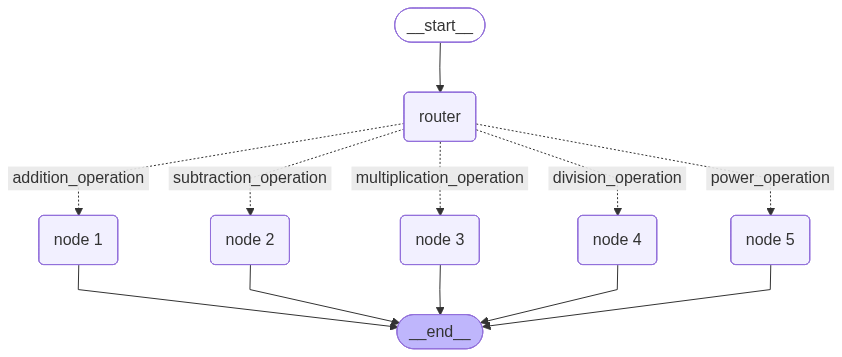

In [38]:
app = graph.compile()
app

In [39]:
response = app.invoke({
    "num1": 4,
    "num2": 2,
    "operation": "**"
})

In [40]:
response["result"]

'Power of two numbers are: 16'